# LSTM

In [1]:
from pandas import read_csv

In [2]:
metrics = read_csv("planetlab02.csv")

In [3]:
import math
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
def assignLabels(values):
    label=[]
    for i in (values):
        if i<20:
            label.append('u')
        elif i>80:
             label.append('o')
        else:
             label.append('n')
    return label

In [5]:
dataset = metrics[metrics.columns[[1]]].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [6]:
model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=70, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

model.summary()

Epoch 1/100
17/17 [==============================] - 1s 56ms/step - loss: 0.0295 - val_loss: 0.0090
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0289 - val_loss: 0.0053
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0275 - val_loss: 0.0053
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.0054
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0233 - val_loss: 0.0053
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.0053
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0225 - val_loss: 0.0053
Epoch 8/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0227 - val_loss: 0.0053
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0220 - val_loss: 0.0053
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.0054
Epoch 

Epoch 83/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.0057
Epoch 84/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.0065
Epoch 85/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.0058
Epoch 86/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.0066
Epoch 87/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0208 - val_loss: 0.0058
Epoch 88/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.0066
Epoch 89/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0202 - val_loss: 0.0058
Epoch 90/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0210 - val_loss: 0.0067
Epoch 91/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.0059
Epoch 92/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0208 - val_loss: 0.0067


In [7]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
print(Y_train[0])
print(len(train_predict[:,0]),train_predict[:,0])
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
trainError = mean_absolute_error(Y_train[0], train_predict[:,0])
testError = mean_absolute_error(Y_test[0], test_predict[:,0])
#print(trainError**0.5)
#print(testError**0.5)


0.0
1177 [ 5.003583   2.2420483  4.5866637 ...  7.400551  15.332585   9.230573 ]


In [8]:
print(trainError**0.5)
print(testError**0.5)

2.9982808111207717
2.4540549954054156


In [9]:
trueLabels=assignLabels(Y_test[0])
predLabels=assignLabels(test_predict[:,0])

In [10]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(trueLabels,predLabels)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 87.09016393442623 %


No handles with labels found to put in legend.


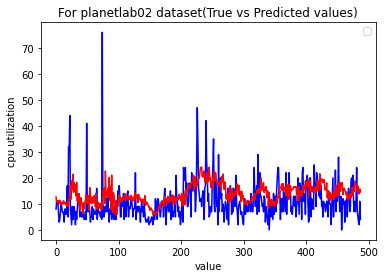

In [11]:
from matplotlib import pyplot
pyplot.xlabel('value')
pyplot.ylabel('cpu utilization')
pyplot.title('For planetlab02 dataset(True vs Predicted values)')
pyplot.plot(Y_test[0],color='blue')
pyplot.plot(test_predict, color='red')
pyplot.legend()
pyplot.show()

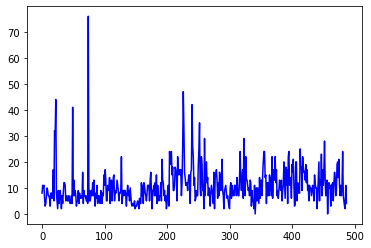

In [12]:
pyplot.plot(Y_test[0],color='blue')